In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from gaia_download import vari_class, vari_short_timescale
import gPhoton
from download_isochrone import load_isochrone
from extinction import add_colors_and_abs_mag
import plotly.graph_objects as go
from simbad_download import fetch_catalog_id
import pyvo as vo

from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord, ICRS
import astropy.units as u
from download_lightcurves import download_dr3_lightcurve

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Configuration file not found:

    /home/maya/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


In [2]:
CLUSTER_NAME: str = 'Trumpler 5'

In [9]:
sources = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}.csv')
clustered = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_clustered.csv')
found = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_found.csv')
isochrone = load_isochrone(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_isochrone.dat')

In [10]:
bss_candidates = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_bss.csv')
yss_candidates = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_yss.csv')

bss_candidates = add_colors_and_abs_mag(bss_candidates)
yss_candidates = add_colors_and_abs_mag(yss_candidates)

In [11]:
bss_candidates = bss_candidates[bss_candidates['G_abs_error']<np.quantile(bss_candidates['G_abs_error'], [.16])[0]]
yss_candidates = yss_candidates[yss_candidates['G_abs_error']<np.quantile(bss_candidates['G_abs_error'], [.16])[0]]

In [12]:
bss_candidates = bss_candidates[bss_candidates.occurences>=0.84]
yss_candidates = yss_candidates[yss_candidates.occurences>=0.84]

In [13]:
%matplotlib notebook

<IPython.core.display.Javascript object>


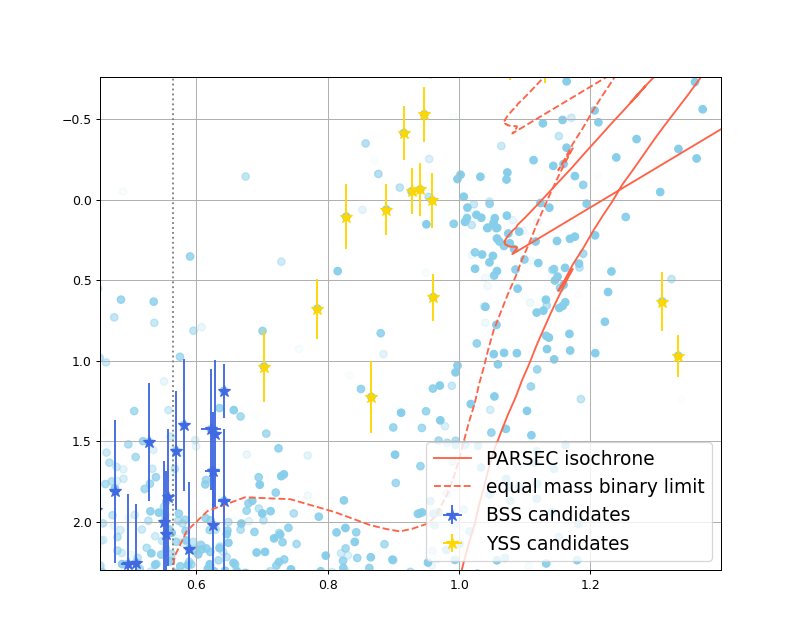

In [14]:
plt.figure(figsize=(10, 8))
TO_COLOR = np.min(isochrone[:, 0])
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', alpha=clustered['occurences'])
plt.errorbar(bss_candidates['BP-RP'], bss_candidates['G_abs'],
             xerr=bss_candidates['BP-RP_error'], yerr=bss_candidates['G_abs_error'],
             color='royalblue', fmt='*', zorder=2, label='BSS candidates', markersize=10.)
plt.errorbar(yss_candidates['BP-RP'], yss_candidates['G_abs'],
             xerr=yss_candidates['BP-RP_error'], yerr=yss_candidates['G_abs_error'],
             color='gold', fmt='*', zorder=2, label='YSS candidates', markersize=10.)

plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', label='PARSEC isochrone')
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', label='equal mass binary limit',
         linestyle='--')
plt.axvline(x=TO_COLOR, color='gray', linestyle='dotted')
plt.gca().invert_yaxis();
plt.legend(fontsize=15, loc='lower right');
plt.grid();

In [15]:
len(bss_candidates)

34

In [16]:
bss_candidates = bss_candidates[bss_candidates['BP-RP']<TO_COLOR]
yss_candidates = yss_candidates[(yss_candidates['BP-RP']<1) & (yss_candidates['G_abs']>=0.5)]

<IPython.core.display.Javascript object>


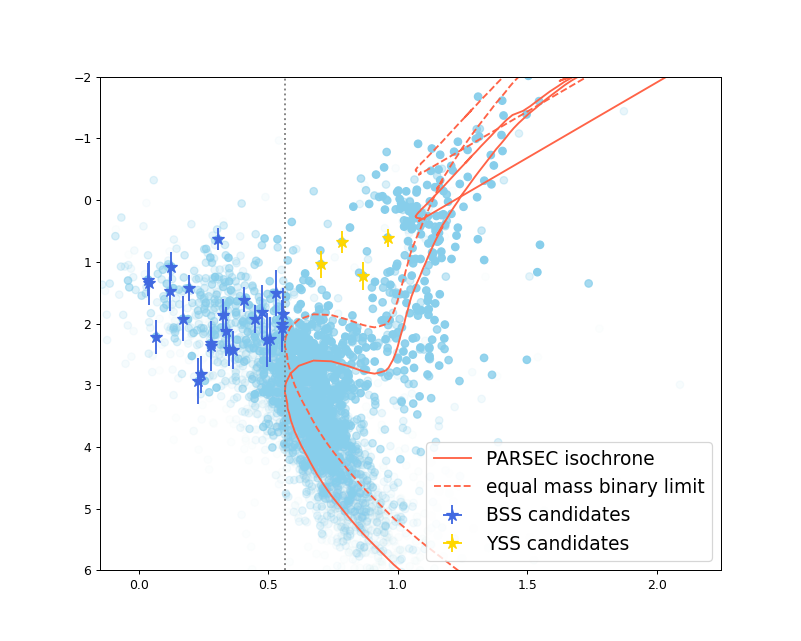

In [19]:
plt.figure(figsize=(10, 8))
TO_COLOR = np.min(isochrone[:, 0])
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', alpha=clustered['occurences'])
plt.errorbar(bss_candidates['BP-RP'], bss_candidates['G_abs'],
             xerr=bss_candidates['BP-RP_error'], yerr=bss_candidates['G_abs_error'],
             color='royalblue', fmt='*', zorder=2, label='BSS candidates', markersize=10.)
plt.errorbar(yss_candidates['BP-RP'], yss_candidates['G_abs'],
             xerr=yss_candidates['BP-RP_error'], yerr=yss_candidates['G_abs_error'],
             color='gold', fmt='*', zorder=2, label='YSS candidates', markersize=10.)

plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', label='PARSEC isochrone')
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', label='equal mass binary limit',
         linestyle='--')
plt.axvline(x=TO_COLOR, color='gray', linestyle='dotted')
plt.gca().invert_yaxis();
plt.legend(fontsize=15, loc='lower right');
plt.gca().set_xlim(-0.15, 2.25);
plt.gca().set_ylim(6, -2.);

# BSS variability

In [22]:
bss_candidates = add_colors_and_abs_mag(bss_candidates).drop_duplicates(subset=['source_id'])

In [23]:
bss_candidates.head()

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,label,occurences,outlier
10,1882,1636148068921376768,Gaia DR3 3326773812263592832,3326773812263592832,1178037232,2016.0,99.050291,0.044101,9.289991,0.040832,...,0.829784,0.535379,0.508048,0.006970,2.254691,0.365403,0.070132,22,0.88,1
23,2596,1636148068921376768,Gaia DR3 3326779726436867456,3326779726436867456,718440935,2016.0,99.199274,0.024028,9.344715,0.021360,...,0.903931,0.583219,0.306262,0.002088,0.635089,0.178334,0.078126,22,0.96,-1
36,2958,1636148068921376768,Gaia DR3 3326781203905606272,3326781203905606272,1432703747,2016.0,99.136126,0.041096,9.412445,0.036797,...,0.945035,0.609739,0.346240,0.005867,2.412673,0.276335,0.083213,22,0.94,1
47,3359,1636148068921376768,Gaia DR3 3326782230399994752,3326782230399994752,1383723023,2016.0,99.242315,0.047603,9.448394,0.042584,...,0.785106,0.506552,0.495394,0.009954,2.263853,0.432907,0.063970,22,0.96,1
48,3381,1636148068921376768,Gaia DR3 3326782303417071104,3326782303417071104,784741007,2016.0,99.273603,0.040647,9.460045,0.037108,...,0.613756,0.395997,0.238775,0.010039,2.823402,0.295083,0.054929,22,0.92,-1


In [24]:
bss_var = bss_candidates[bss_candidates.phot_variable_flag=='VARIABLE']

In [25]:
bss_var

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,label,occurences,outlier
121,5104,1636148068921376768,Gaia DR3 3326786353568812416,3326786353568812416,778594288,2016.0,99.172578,0.02718,9.505477,0.024664,...,0.863392,0.557063,0.124947,0.005528,1.075097,0.230445,0.065777,22,1.0,-1


In [26]:
bss_classes = vari_class(bss_var.source_id.values)

INFO: Query finished. [astroquery.utils.tap.core]


In [27]:
bss_classes

,source_id,in_vari_rrlyrae,in_vari_cepheid,in_vari_planetary_transit,in_vari_short_timescale,in_vari_long_period_variable,in_vari_eclipsing_binary,in_vari_rotation_modulation,in_vari_ms_oscillator,in_vari_agn,in_vari_microlensing,in_vari_compact_companion
0,3326786353568812416,false,false,false,false,false,true,false,false,false,false,false


In [28]:
def mag_error(flux_over_error: float) -> float:
    return 1/(flux_over_error*2.5/np.log(10))


def gaia_time_to_bjd(tcb_time: float) -> float:
    return tcb_time + 2455197.5

def load_dr3_lightcurve(lc1: pd.DataFrame) -> pd.DataFrame:
    lc1['mag_error'] = mag_error(lc1.flux_error.values)
    lc1['time'] = gaia_time_to_bjd(lc1['time'])
    return lc1
    
def get_gaia_bands(lc1: pd.DataFrame):
    lc_dict = {}
    for band in ['G', 'BP', 'RP']:
        lc_dict[band] = lc1[lc1.band==band]
    return lc_dict

def plot(lcs: pd.DataFrame, band: str):
    lc = lcs[band]
    plt.figure(figsize=(10, 7))
    plt.errorbar(lc.time, lc.mag, yerr=lc.mag_error, fmt='o', color=COLORS[band], label=band);
    plt.gca().set_xlabel('time [JD]', fontsize=16);
    plt.gca().set_ylabel('mag', fontsize=16);
    plt.legend(fontsize=16);

COLORS = {
    'G': 'black',
    'BP': 'royalblue',
    'RP': 'indianred'
}

In [29]:
lc = get_gaia_bands(load_dr3_lightcurve(download_dr3_lightcurve([2211122217085752704])[0]))

len['EPOCH_PHOTOMETRY-Gaia DR3 2211122217085752704.xml'] lightcurves found.


In [30]:
np.any(bss_candidates.non_single_star)

True

In [31]:
bss_candidates[bss_candidates.non_single_star!=0]

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,label,occurences,outlier
121,5104,1636148068921376768,Gaia DR3 3326786353568812416,3326786353568812416,778594288,2016.0,99.172578,0.02718,9.505477,0.024664,...,0.863392,0.557063,0.124947,0.005528,1.075097,0.230445,0.065777,22,1.0,-1


In [32]:
bss_candidates[bss_candidates.ruwe>1.4][['source_id', 'has_epoch_photometry', 'ruwe', 'excess', 'occurences']]

,source_id,has_epoch_photometry,ruwe,excess,occurences


In [33]:
np.any(bss_candidates.has_epoch_rv)

False

In [34]:
bss_rv_amplitude = bss_candidates.dropna(subset=['rv_amplitude_robust'])
bss_rv_amplitude[['source_id', 'radial_velocity', 'rv_amplitude_robust', 'radial_velocity_error']]

,source_id,radial_velocity,rv_amplitude_robust,radial_velocity_error


In [35]:
np.abs(bss_rv_amplitude.rv_amplitude_robust)>=6*bss_rv_amplitude.radial_velocity_error

Series([], dtype: bool)

In [36]:
bss_rv_amplitude.parallax_over_error

Series([], Name: parallax_over_error, dtype: float64)

In [37]:
bss_rv_amplitude.ruwe

Series([], Name: ruwe, dtype: float64)

In [38]:
bss_rv_amplitude.G_abs

Series([], Name: G_abs, dtype: float64)

In [39]:
bss_rv_amplitude['BP-RP']

Series([], Name: BP-RP, dtype: float64)

In [40]:
for _, bss in bss_var.iterrows():
    print(f'{bss.source_id}: {bss.ra}, {bss.dec}:')
    gPhoton.gFind(skypos=[bss.ra, bss.dec])
    print()

3326786353568812416: 99.1725776145743, 9.505476763829014:
NUV: 192.0s (raw) in 2 exposures.
    [ 1008059326.995, 1008059421.995 ], 95.000 seconds
    [ 1008071156.995, 1008071253.995 ], 97.000 seconds
No FUV exposure time in database.



# YSS variability

In [41]:
yss_var = yss_candidates[yss_candidates.phot_variable_flag=='VARIABLE'].drop_duplicates(subset=['source_id'])

In [42]:
yss_var

,Unnamed: 0,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,label,occurences,outlier


In [43]:
yss_var.has_epoch_photometry

Series([], Name: has_epoch_photometry, dtype: bool)

In [44]:
for _, bss in yss_var.iterrows():
    print(f'{bss.source_id}: {bss.ra}, {bss.dec}:')
    gPhoton.gFind(skypos=[bss.ra, bss.dec])
    print()

In [45]:
yss_candidates.non_single_star

11    0
24    0
25    0
61    0
Name: non_single_star, dtype: int64

In [46]:
yss_candidates.ruwe

11    1.043890
24    1.057999
25    0.978440
61    1.068322
Name: ruwe, dtype: float64

In [47]:
yss_rv_amplitude = yss_candidates.dropna(subset=['rv_amplitude_robust'])
yss_rv_amplitude[['source_id', 'rv_amplitude_robust', 'radial_velocity_error', 'occurences']]

,source_id,rv_amplitude_robust,radial_velocity_error,occurences


In [48]:
np.abs(yss_rv_amplitude.rv_amplitude_robust)>=6*yss_rv_amplitude.radial_velocity_error

Series([], dtype: bool)

In [54]:
len(bss_candidates)

25

In [55]:
len(yss_candidates)

4

In [56]:
yss_candidates.occurences.value_counts()

1.0    4
Name: occurences, dtype: int64

In [57]:
len(bss_candidates.drop_duplicates(subset=['source_id']))

25

In [58]:
len(yss_candidates)

4

In [59]:
bss_candidates.to_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_bss.csv')
yss_candidates.to_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_yss.csv')